Acurácia do Modelo: 0.45


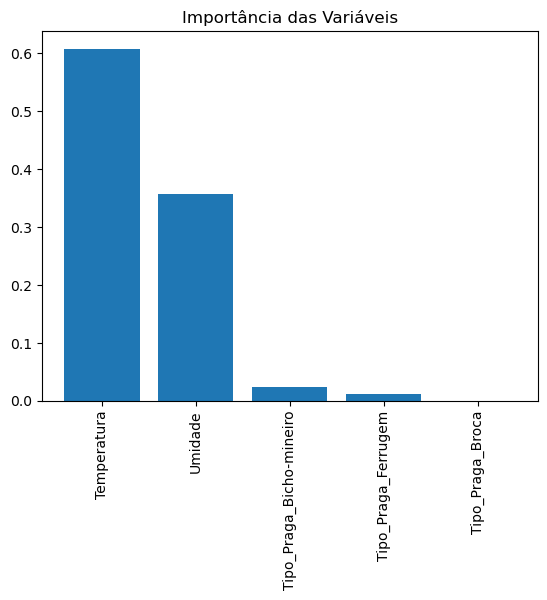

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Geração de Dados Simulados
np.random.seed(42)
n_samples = 200
temperatura = np.random.normal(25, 3, n_samples)  # temperatura média 25°C com desvio de 3
umidade = np.random.normal(80, 10, n_samples)  # umidade média 80% com desvio de 10
tipo_praga = np.random.choice(['Broca', 'Ferrugem', 'Bicho-mineiro'], n_samples)
severidade = np.random.choice(['Baixa', 'Média', 'Alta'], n_samples)

dados = pd.DataFrame({
    'Temperatura': temperatura,
    'Umidade': umidade,
    'Tipo_Praga': tipo_praga,
    'Severidade': severidade
})

# Passo 2: Pré-processamento de Dados
# Criar variáveis dummy para todas as categorias
dados = pd.get_dummies(dados, columns=['Tipo_Praga', 'Severidade'], drop_first=False)

# Dividindo as variáveis independentes e dependentes
X = dados.drop(['Severidade_Baixa', 'Severidade_Média', 'Severidade_Alta'], axis=1)
y = dados['Severidade_Média']  # Vamos prever se a severidade é média

# Passo 3: Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Treinamento de Modelo de IA
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Passo 5: Avaliação do Modelo
previsoes = modelo.predict(X_test)
print("Acurácia do Modelo:", accuracy_score(y_test, previsoes))

# Passo 6: Visualização
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

plt.figure()
plt.title("Importância das Variáveis")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

